## we import the libray that we will be using throughout this exercice 
 ### In this exercice we will predict the home market value in dollar($)  and the square feet 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.dpi']= 80
sns.set_style("whitegrid")
sns.set_context("poster")

In [11]:
# We read and load the csv file into a pandas dataframe  
homemarket =pd.read_csv('homeMarket.csv')

In [12]:
# we print the first 5 elements of the dataframe
homemarket.head()

,HouseAge,SquareFeet,MarketValue
0,33,1812,90000
1,32,1914,104400
2,32,1842,93300
3,33,1812,91000
4,32,1836,101900


In [4]:
homemarket.tail()

,House Age,Square Feet,Market Value
37,27,1484.0,81300.0
38,27,1520.0,100700.0
39,28,1520.0,87200.0
40,27,1684.0,96700.0
41,27,1581.0,120700.0


In [13]:
# we call info to get the data types 
homemarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
HouseAge       42 non-null int64
SquareFeet     42 non-null int64
MarketValue    42 non-null int64
dtypes: int64(3)
memory usage: 1.1 KB


In [15]:
# we apply describe function on the dataframe to get the descriptive statistics 
homemarket.describe()

,HouseAge,SquareFeet,MarketValue
count,42.000000,42.000000,42.000000
mean,29.833333,1695.261905,92069.047619
std,2.428657,220.256730,10553.082733
min,27.000000,1468.000000,76600.000000
25%,28.000000,1520.000000,86575.000000
50%,28.000000,1666.000000,88500.000000
75%,32.000000,1806.750000,96525.000000
max,33.000000,2372.000000,120700.000000


 # The result above gives the min, max, mean, std, number of elements and etc..


In [17]:
#To do a linear regression we will need the value that we want to predict which is a dependent variable y
# we extract y from the dataframe
# in this cas y will hold the home market value that we will predict
y=homemarket.iloc[:,-1].values

In [19]:
# In the same way, we extract x from the dataframe which represent the independent variable
# Simple linear regression involves only one independent variable and dependent variable
x=homemarket.iloc[:,1:2].values

# We are applying a simple linear regression so we will need  one independent variable

In [21]:
# Let us look at the correlation among the variables
homemarket.corr()

,HouseAge,SquareFeet,MarketValue
HouseAge,1.000000,0.645669,0.361415
SquareFeet,0.645669,1.000000,0.731255
MarketValue,0.361415,0.731255,1.000000


# the result above shows that there is a correlation between market value and square feet
# when the square feet increases, the market value will also increase

In [22]:
# Now we have identified our dependent and independent variables 
# we can create a linear model by call the linear regression object
linearModel =LinearRegression()

In [23]:
# the object linear model is ready, now we will fit the model with x, and y
linearModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# we print the intercept of the linear model
print('Linear model intercept is:  {} : '.format(linearModel.intercept_))

Linear model intercept is:  32673.21989724304 : 


In [25]:
# we find the number of independent variables in our model 
print('Number of coefficients : {}:'.format(len(linearModel.coef_)))

Number of coefficients : 1:


In [26]:
# This is the coefficents of each independent variables
print('Linear model coefficients :{}'.format(linearModel.coef_))

Linear model coefficients :[35.03637258]


# The simple linear equation  is :
#Home Market value = 35.036 * Square feet + 32673.22

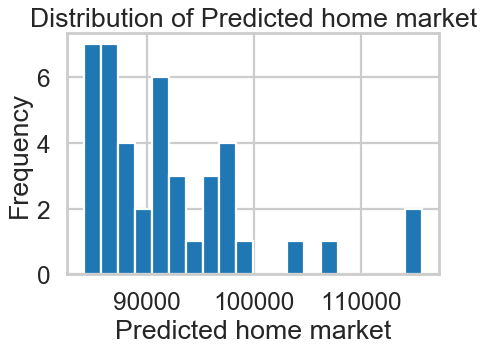

In [27]:
# we plot the histogramme of the predicted home market value
plt.hist(linearModel.predict(x),bins=20)
plt.xlabel("Predicted home market")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted home market");

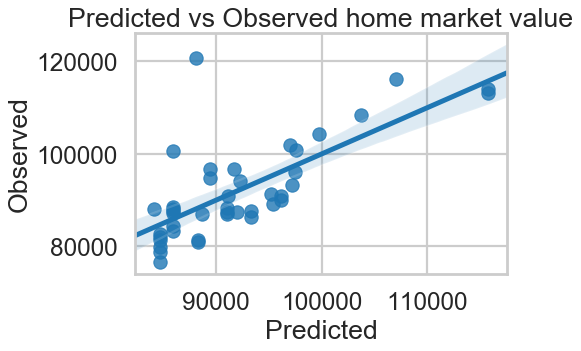

In [31]:
# We plot the relationship between observed and predicted the home market value 
sns.regplot(x=linearModel.predict(x), y=homemarket.MarketValue)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title(('Predicted vs Observed home market value'));

 Reference is http://localhost:8888/notebooks/Desktop/Data%20Analytics%202/shared%20NYU%20ADA-II%20S2.3%20Linear_Regression.ipynb